In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
inflation_adjusted_df = pd.read_pickle('venv/pickles/income_and_expenditure.pkl')

In [43]:
inflation_adjusted_df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,STRATUM,PSU_ID,MONTH_SLOT,MONTH,HH_WEIGHT_MS,...,INCOME_OF_HOUSEHOLD_FROM_GAMBLING,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT,INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_NGO,yyyy-mm,TOTAL_EXPENDITURE,necessities,education,luxuries,Year,Month
2912,73659045,Karnataka,HR 61,Davanagere,RURAL,HR 61_RURAL_R,PSU_ID_9810,Mar 2014,2014-01-01,3635.829954,...,NaN,NaN,NaN,2014-01,5385,4580,0,745,2014,Jan
2914,57052418,Karnataka,HR 61,Davanagere,RURAL,HR 61_RURAL_R,PSU_ID_9810,Mar 2014,2014-01-01,3635.829954,...,NaN,NaN,NaN,2014-01,5035,4470,0,325,2014,Jan
2915,54287040,Karnataka,HR 61,Davanagere,RURAL,HR 61_RURAL_R,PSU_ID_9810,Mar 2014,2014-01-01,3635.829954,...,NaN,NaN,NaN,2014-01,3365,3075,0,225,2014,Jan
2916,96476003,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_9847,Feb 2014,2014-01-01,4087.139066,...,NaN,NaN,NaN,2014-01,6105,5190,65,740,2014,Jan
2917,92344058,Karnataka,HR 62,Bellary,RURAL,HR 62_RURAL_R,PSU_ID_9847,Feb 2014,2014-01-01,4087.139066,...,NaN,NaN,NaN,2014-01,3765,3220,35,475,2014,Jan


In [44]:
inflation_adjusted_df = inflation_adjusted_df.drop(['STRATUM', 'PSU_ID', 'HH_WEIGHT_MS', 'HH_WEIGHT_FOR_COUNTRY_MS', 'HH_WEIGHT_FOR_STATE_MS', 'HH_NON_RESPONSE_MS', 'HH_NON_RESPONSE_FOR_COUNTRY_MS', 'HH_NON_RESPONSE_FOR_STATE_MS'], axis=1)

In [45]:
inflation_adjusted_df.columns.tolist()

['HH_ID',
 'STATE',
 'HR',
 'DISTRICT',
 'REGION_TYPE',
 'MONTH_SLOT',
 'MONTH',
 'AGE_GROUP',
 'OCCUPATION_GROUP',
 'EDUCATION_GROUP',
 'GENDER_GROUP',
 'SIZE_GROUP',
 'TOTAL_INCOME',
 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
 'INCOME_OF_ALL_MEMBERS_FROM_PENSION',
 'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND',
 'INCOME_OF_ALL_MEMBERS_FROM_INTEREST',
 'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INSURANCE',
 'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES',
 'INCOME_OF_HOUSEHOLD_FROM_RENT',
 'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
 'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
 'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS',
 'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT',
 'INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET',
 'INCOME_OF_HOUSEHOLD_FROM_GAMBLING',
 'INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT',
 'INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_NGO',
 'yyyy-mm',
 'TOTAL_EXPENDITURE',
 'necessities',
 'education',
 'luxuries',
 'Year',
 'Month']

In [46]:
non_farming_incomes = [
 'INCOME_OF_ALL_MEMBERS_FROM_PENSION',
 'INCOME_OF_ALL_MEMBERS_FROM_DIVIDEND',
 'INCOME_OF_ALL_MEMBERS_FROM_INTEREST', 'INCOME_OF_ALL_MEMBERS_FROM_FD_PF_INSURANCE',
 'INCOME_OF_HOUSEHOLD_FROM_RENT',
 'INCOME_OF_HOUSEHOLD_FROM_PRIVATE_TRANSFERS',
 'INCOME_OF_HOUSEHOLD_FROM_GOVERNMENT_TRANSFERS',
 'INCOME_OF_HOUSEHOLD_FROM_SALE_OF_ASSET',
 'INCOME_OF_HOUSEHOLD_FROM_GAMBLING',
 'INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_GOVERNMENT',
 'INCOME_OF_HOUSEHOLD_FROM_IN_KIND_TRANSFERS_FROM_NGO',]

In [47]:
inflation_adjusted_df['INCOME_FROM_NON_FARMING_SOURCES'] = inflation_adjusted_df[non_farming_incomes].sum(axis=1)
inflation_adjusted_df.drop(non_farming_incomes, axis=1, inplace=True)



In [48]:
inflation_adjusted_df = inflation_adjusted_df[inflation_adjusted_df['Year'] >= 2018]

In [49]:
inflation_adjusted_df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,MONTH,AGE_GROUP,OCCUPATION_GROUP,EDUCATION_GROUP,...,INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT,yyyy-mm,TOTAL_EXPENDITURE,necessities,education,luxuries,Year,Month,INCOME_FROM_NON_FARMING_SOURCES
6020,67512416,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Matriculates minority household,...,0,0,2018-01,11435,7180,0,3565,2018,Jan,250.0
6024,87229706,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Matriculates minority household,...,0,0,2018-01,4535,4005,0,280,2018,Jan,0.0
6023,50709937,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Households of some literates,...,0,0,2018-01,4320,3690,0,330,2018,Jan,0.0
6022,74712805,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Others households of Grown-ups,Small/Marginal Farmers,Households of some literates,...,0,0,2018-01,6995,5405,300,1090,2018,Jan,250.0
6021,59455207,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Agricultural Labourers,Households of all literates,...,0,0,2018-01,3860,3045,0,715,2018,Jan,0.0


In [50]:
inflation_data = pd.read_csv("venv/inflation_index.csv")
inflation_data.head()

,Year,Inflation Index
0,1960.0,3.068381
1,1961.0,3.141976
2,1962.0,3.255201
3,1963.0,3.374086
4,1964.0,3.725082


In [51]:
inflation_adjusted_df = pd.merge(inflation_adjusted_df, inflation_data, on="Year")
inflation_adjusted_df.columns.tolist()

['HH_ID',
 'STATE',
 'HR',
 'DISTRICT',
 'REGION_TYPE',
 'MONTH_SLOT',
 'MONTH',
 'AGE_GROUP',
 'OCCUPATION_GROUP',
 'EDUCATION_GROUP',
 'GENDER_GROUP',
 'SIZE_GROUP',
 'TOTAL_INCOME',
 'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
 'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES',
 'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
 'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT',
 'yyyy-mm',
 'TOTAL_EXPENDITURE',
 'necessities',
 'education',
 'luxuries',
 'Year',
 'Month',
 'INCOME_FROM_NON_FARMING_SOURCES',
 'Inflation Index']

In [52]:

index_2018 = inflation_adjusted_df[inflation_adjusted_df['Year'] == 2018]['Inflation Index'].mean()

# Adjust all inflation indices relative to the year 2018
inflation_adjusted_df['Inflation Index'] = inflation_adjusted_df['Inflation Index'] / index_2018

# Check for zero values
assert not any(inflation_adjusted_df['Inflation Index'] == 0), "Inflation Index contains zero values"

# List of columns to adjust for inflation
columns_to_adjust = [
    'TOTAL_INCOME',
    'INCOME_OF_ALL_MEMBERS_FROM_ALL_SOURCES',
    'INCOME_OF_HOUSEHOLD_FROM_ALL_SOURCES',
    'INCOME_OF_HOUSEHOLD_FROM_SELF_PRODUCTION',
    'INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT',
    'TOTAL_EXPENDITURE',
    'necessities',
    'education',
    'luxuries',
    'INCOME_FROM_NON_FARMING_SOURCES'
]

# Adjust the columns for inflation
for column in columns_to_adjust:
    inflation_adjusted_df[column] = inflation_adjusted_df[column] / inflation_adjusted_df['Inflation Index']


In [53]:
inflation_adjusted_df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,MONTH,AGE_GROUP,OCCUPATION_GROUP,EDUCATION_GROUP,...,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT,yyyy-mm,TOTAL_EXPENDITURE,necessities,education,luxuries,Year,Month,INCOME_FROM_NON_FARMING_SOURCES,Inflation Index
0,67512416,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Matriculates minority household,...,0.0,2018-01,11435.0,7180.0,0.0,3565.0,2018,Jan,250.0,1.0
1,87229706,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Matriculates minority household,...,0.0,2018-01,4535.0,4005.0,0.0,280.0,2018,Jan,0.0,1.0
2,50709937,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Households of some literates,...,0.0,2018-01,4320.0,3690.0,0.0,330.0,2018,Jan,0.0,1.0
3,74712805,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Others households of Grown-ups,Small/Marginal Farmers,Households of some literates,...,0.0,2018-01,6995.0,5405.0,300.0,1090.0,2018,Jan,250.0,1.0
4,59455207,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Agricultural Labourers,Households of all literates,...,0.0,2018-01,3860.0,3045.0,0.0,715.0,2018,Jan,0.0,1.0


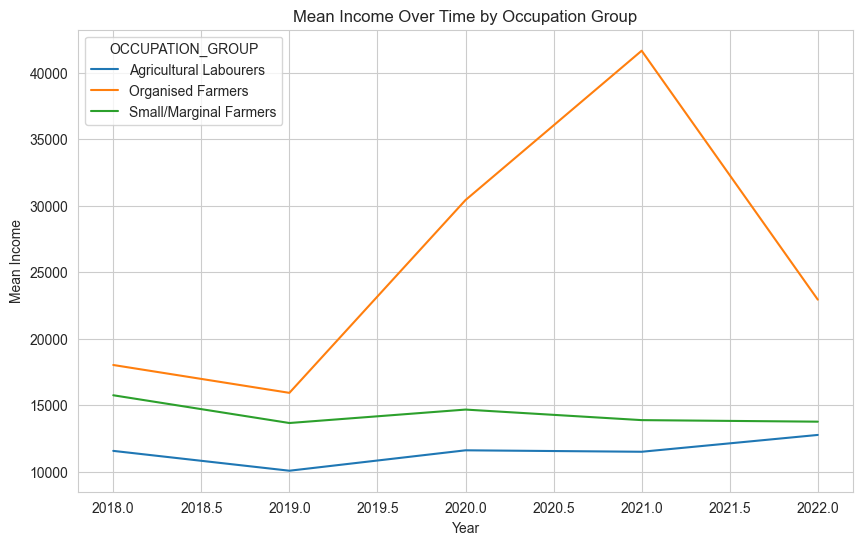

In [54]:
# compute the mean income by yeaar and occupation_group
grouped = inflation_adjusted_df.groupby(['Year', 'OCCUPATION_GROUP'])['TOTAL_INCOME'].mean().reset_index()

# Use seaborn to create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='TOTAL_INCOME', hue='OCCUPATION_GROUP', data=grouped)

plt.title('Mean Income Over Time by Occupation Group')
plt.xlabel('Year')
plt.ylabel('Mean Income')

plt.show()

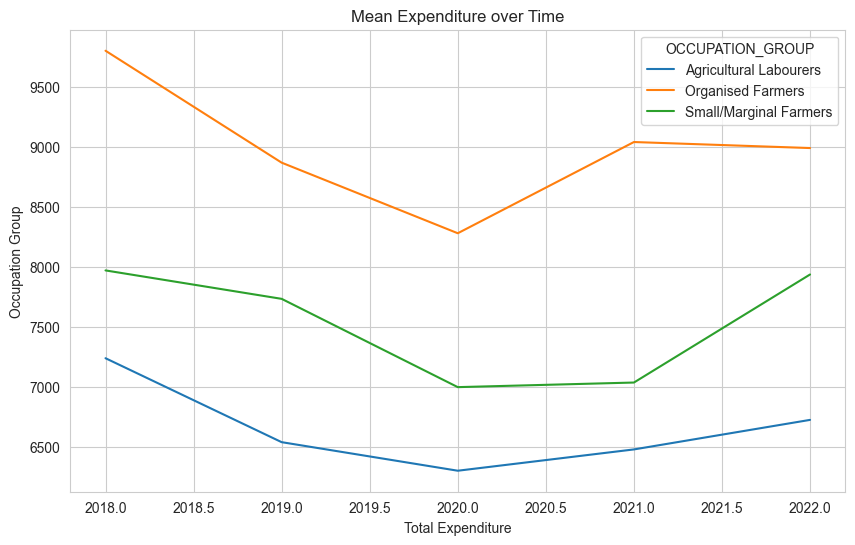

In [55]:
# compute mean expenditure by group
grouped_exp = inflation_adjusted_df.groupby(['Year', 'OCCUPATION_GROUP'])['TOTAL_EXPENDITURE'].mean().reset_index()

# Use seaborn to create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='TOTAL_EXPENDITURE', hue='OCCUPATION_GROUP', data=grouped_exp)
plt.title('Mean Expenditure over Time')
plt.xlabel('Total Expenditure')
plt.ylabel('Occupation Group')
plt.show()




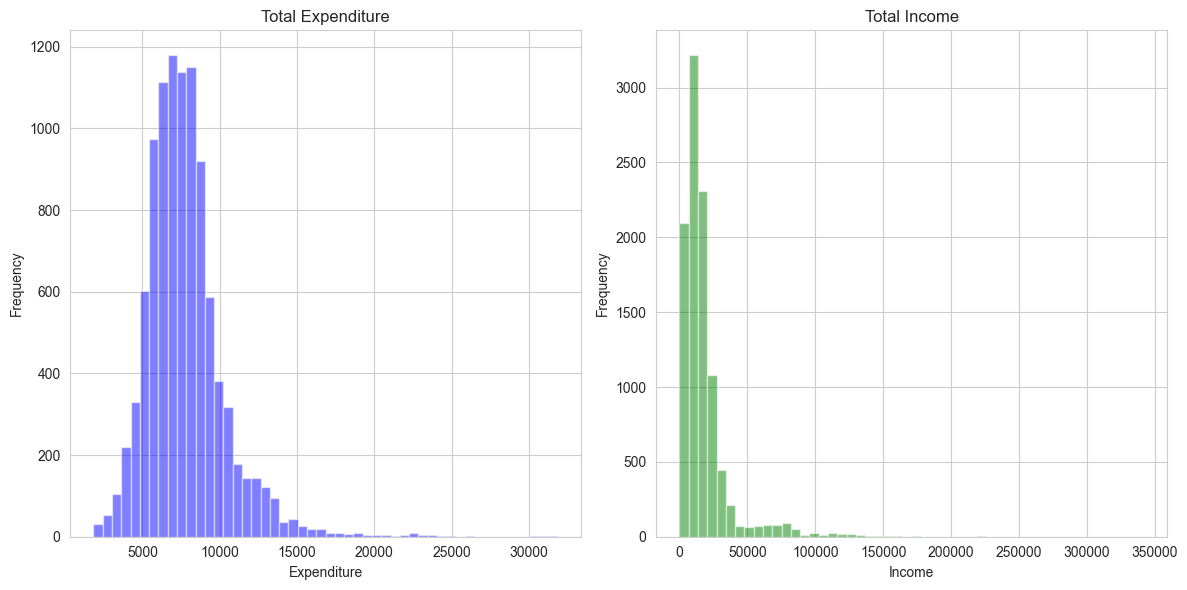

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].hist(inflation_adjusted_df['TOTAL_EXPENDITURE'], bins=50, color='blue', alpha=0.5)
axes[0].set_title('Total Expenditure')
axes[0].set_xlabel('Expenditure')
axes[0].set_ylabel('Frequency')

axes[1].hist(inflation_adjusted_df['TOTAL_INCOME'], bins=50, color='green', alpha=0.5)
axes[1].set_title('Total Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

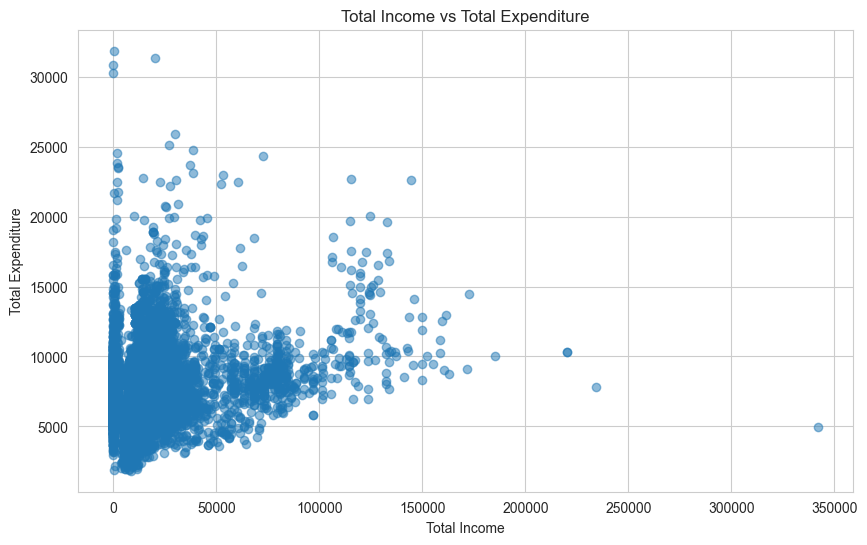

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(inflation_adjusted_df['TOTAL_INCOME'], inflation_adjusted_df['TOTAL_EXPENDITURE'], alpha=0.5)
plt.title('Total Income vs Total Expenditure')
plt.xlabel('Total Income')
plt.ylabel('Total Expenditure')
plt.grid(True)
plt.show()

In [35]:
df_long = inflation_adjusted_df.melt(id_vars='MONTH', value_vars=['TOTAL_EXPENDITURE', 'TOTAL_INCOME'], var_name='Type', value_name='Value')


In [58]:
inflation_adjusted_df.head()

,HH_ID,STATE,HR,DISTRICT,REGION_TYPE,MONTH_SLOT,MONTH,AGE_GROUP,OCCUPATION_GROUP,EDUCATION_GROUP,...,INCOME_OF_HOUSEHOLD_FROM_BUSINESS_PROFIT,yyyy-mm,TOTAL_EXPENDITURE,necessities,education,luxuries,Year,Month,INCOME_FROM_NON_FARMING_SOURCES,Inflation Index
0,67512416,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Matriculates minority household,...,0.0,2018-01,11435.0,7180.0,0.0,3565.0,2018,Jan,250.0,1.0
1,87229706,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Matriculates minority household,...,0.0,2018-01,4535.0,4005.0,0.0,280.0,2018,Jan,0.0,1.0
2,50709937,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Small/Marginal Farmers,Households of some literates,...,0.0,2018-01,4320.0,3690.0,0.0,330.0,2018,Jan,0.0,1.0
3,74712805,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Others households of Grown-ups,Small/Marginal Farmers,Households of some literates,...,0.0,2018-01,6995.0,5405.0,300.0,1090.0,2018,Jan,250.0,1.0
4,59455207,Karnataka,HR 61,Gadag,RURAL,Apr 2018,2018-01-01,Grown-up - dominant,Agricultural Labourers,Households of all literates,...,0.0,2018-01,3860.0,3045.0,0.0,715.0,2018,Jan,0.0,1.0


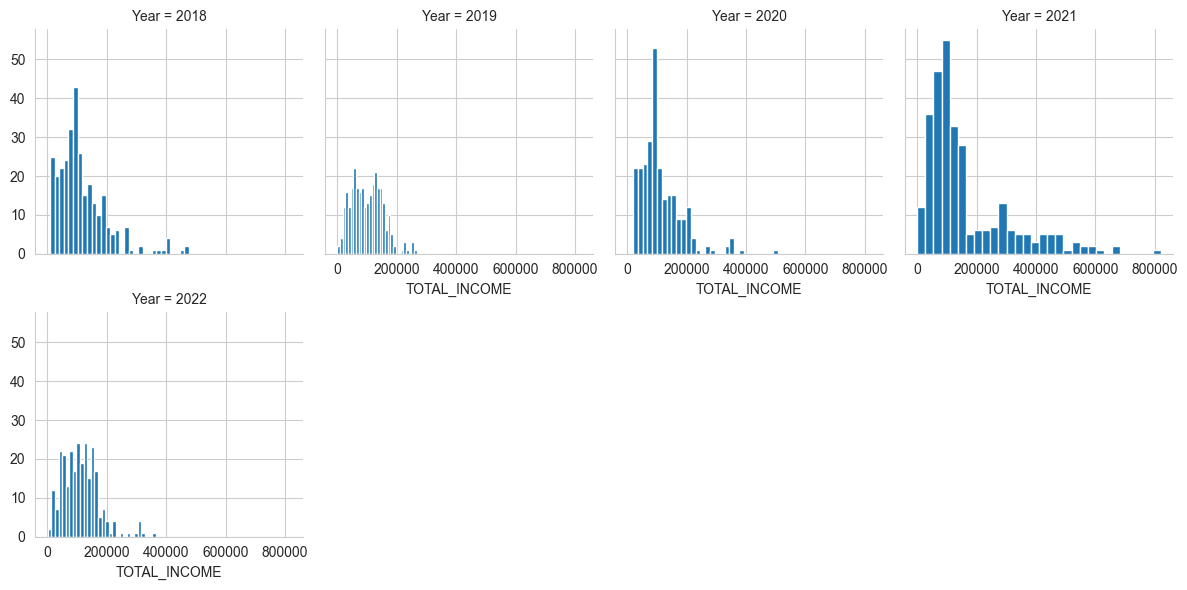

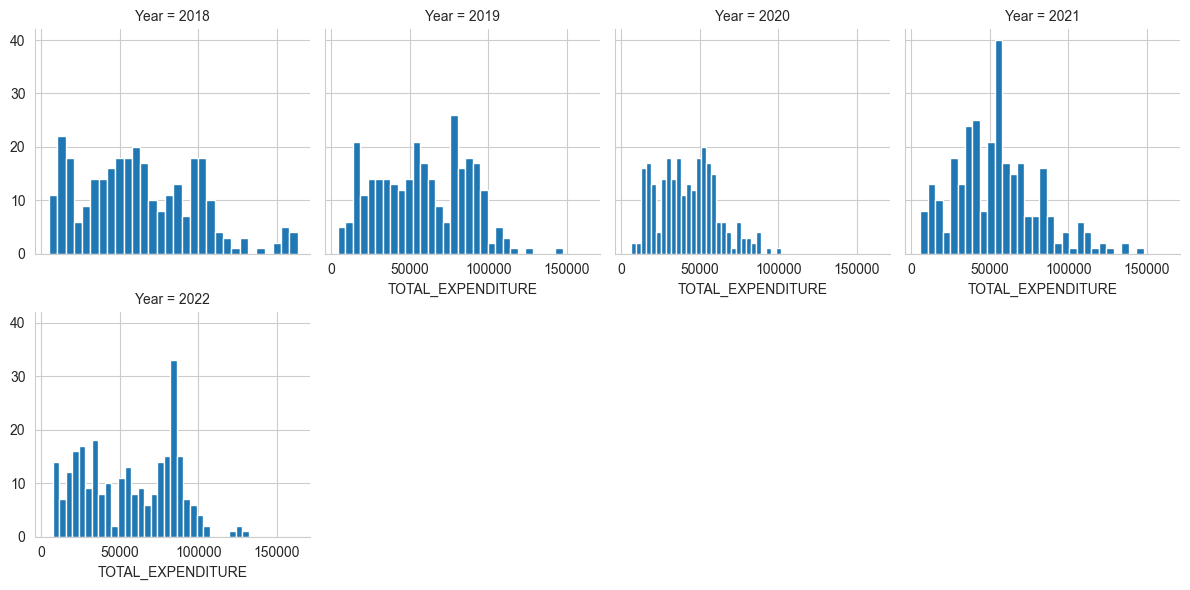

In [59]:
# Convert 'MONTH' to datetime format and extract year
inflation_adjusted_df['MONTH'] = pd.to_datetime(inflation_adjusted_df['MONTH'], format='%b %Y')
inflation_adjusted_df['Year'] = inflation_adjusted_df['MONTH'].dt.year

# Sum income and expenditure for each household for each year
annual_df = inflation_adjusted_df.groupby(['Year', 'HH_ID'])[['TOTAL_INCOME', 'TOTAL_EXPENDITURE']].sum().reset_index()

# Create FacetGrid for 'TOTAL_INCOME'
g = sns.FacetGrid(annual_df, col="Year", col_wrap=4, margin_titles=True)
g.map(plt.hist, "TOTAL_INCOME", bins=30)

plt.show()

# Create FacetGrid for 'TOTAL_EXPENDITURE'
g = sns.FacetGrid(annual_df, col="Year", col_wrap=4, margin_titles=True)
g.map(plt.hist, "TOTAL_EXPENDITURE", bins=30)

plt.show()

In [60]:
inflation_adjusted_df.to_pickle('venv/pickles/adjusted_income_and_expenditure.pkl')
